In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c


In [3]:
def check_initial_values(f, x_min, x_max, tol):
    y_min = f(x_min)
    y_max = f(x_max)
    
    if(y_min*y_max >= 0.0):
        print("No zero crossing found in the range = ", x_min, x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min, y_min, x_max, y_max)
        print(s)
        return 0
    
    if (np.fabs(y_min)<tol):
        return 1
    
    if (np.fabs(y_max)<tol):
        return 2
    
    return 3

In [4]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    imax = 10000
    i = 0
    
    flag = check_initial_values(f, x_min, x_max, tol)
    if (flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid', x_min, x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
        flag = 1
    
    while(flag):
        x_mid = 0.5*(x_min + x_max)
        y_mid = f(x_mid)
        
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            if (f(x_min)*f(x_mid)>0):
                x_min = x_mid
            else:
                x_max = x_mid
                
        print (x_min, f(x_min), x_max, f(x_max))
        
        i+= 1
        
        if(i >= imax):
            print("Exceeded max number of iterations = ", i)
            s = "Min bracket f(%f) = %f" % (x_min, f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max, f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid, f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after', i)
    return x_mid

In [12]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

print(x_min, function_for_roots(x_min))
print(x_max, function_for_roots,(x_max))

x_root= bisection_root_finding(function_for_roots, x_min, x_max, tolerance)
y_root = function_for_roots(x_root)

s = "Root found y(%f) - %f" % (x_root, y_root)

print(s)

0.0 2.07
1.5 <function function_for_roots at 0x1141bbf28> 1.5
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.18782825

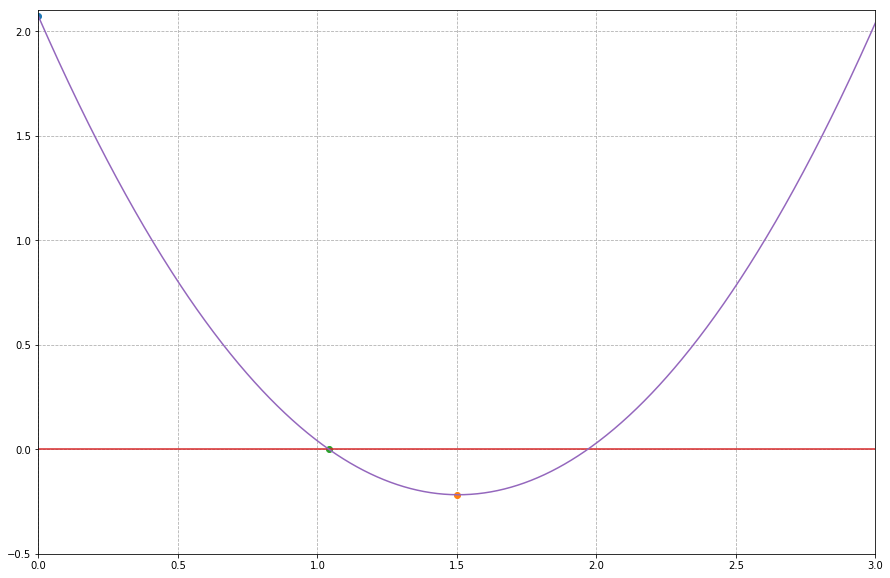

In [13]:
f = plt.figure(figsize=(15,10))
x = np.linspace(0, 3, 1000)



w = 0*x

plt.plot(x_min, function_for_roots(x_min), marker= 'o')
plt.plot(x_max, function_for_roots(x_max), marker= 'o')


plt.plot(x_root, y_root, marker  ='o')

plt.plot(x,w)
plt.plot(x, function_for_roots(x))

plt.xlim(0,3)
plt.ylim(-0.5,2.1)

plt.grid(ls = "--")
plt.show()